In [1]:
import pybullet as p
import pybullet_data
import numpy as np
import time
import matplotlib.pyplot as plt

pybullet build time: Oct  3 2022 17:04:40


In [2]:
physicsClient = p.connect(p.DIRECT)#or p.DIRECT for non-graphical version
p.setAdditionalSearchPath(pybullet_data.getDataPath()) #used by loadURDF
p.setGravity(0,0,-10)
planeId = p.loadURDF("plane.urdf")
cubeStartPos = [0,0,0]
cubeStartOrientation = p.getQuaternionFromEuler([0,0,0])
boxId = p.loadURDF("husky/husky.urdf",cubeStartPos, cubeStartOrientation)

b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
base_footprintb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
imu_linkb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
top_plate_linkb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrd

# Membuat Fungsi Gerak

In [3]:
def maju(boxId, waktu):
    orientasi = []
    for i in range(int(2400*waktu)):
        p.setJointMotorControl2(boxId, 2 , p.VELOCITY_CONTROL, targetVelocity = 10, )
        p.setJointMotorControl2(boxId, 3 , p.VELOCITY_CONTROL, targetVelocity = 10, )
        p.setJointMotorControl2(boxId, 4 , p.VELOCITY_CONTROL, targetVelocity = 10, )
        p.setJointMotorControl2(boxId, 5 , p.VELOCITY_CONTROL, targetVelocity = 10, )
        time.sleep(1./2400.)
        (linkWorldPosition,
            linkWorldOrientation,
            localInertialFramePosition,
            localInertialFrameOrientation,
            worldLinkFramePosition,
            worldLinkFrameOrientation,
            worldLinkLinearVelocity,
            worldLinkAngularVelocity) = p.getLinkState(boxId,0, computeLinkVelocity=1, computeForwardKinematics=1)
        orientasi.append(list(linkWorldOrientation))
        p.stepSimulation()
    return np.array(orientasi)

def belok_kanan(boxId, waktu):
    orientasi = []
    for _ in range(int(2400*waktu)):
        p.setJointMotorControl2(boxId, 2 , p.VELOCITY_CONTROL, targetVelocity = 10, )
        p.setJointMotorControl2(boxId, 3 , p.VELOCITY_CONTROL, targetVelocity = 0, )
        p.setJointMotorControl2(boxId, 4 , p.VELOCITY_CONTROL, targetVelocity = 10, )
        p.setJointMotorControl2(boxId, 5 , p.VELOCITY_CONTROL, targetVelocity = 0, )
        time.sleep(1./2400.)
        (linkWorldPosition,
            linkWorldOrientation,
            localInertialFramePosition,
            localInertialFrameOrientation,
            worldLinkFramePosition,
            worldLinkFrameOrientation,
            worldLinkLinearVelocity,
            worldLinkAngularVelocity) = p.getLinkState(boxId,0, computeLinkVelocity=1, computeForwardKinematics=1)
        orientasi.append(list(linkWorldOrientation))
        p.stepSimulation()
    return np.array(orientasi)

def belok_kiri(boxId, waktu):
    orientasi = []
    for _ in range(int(2400*waktu)):
        p.setJointMotorControl2(boxId, 2 , p.VELOCITY_CONTROL, targetVelocity = 0, )
        p.setJointMotorControl2(boxId, 3 , p.VELOCITY_CONTROL, targetVelocity = 10, )
        p.setJointMotorControl2(boxId, 4 , p.VELOCITY_CONTROL, targetVelocity = 0, )
        p.setJointMotorControl2(boxId, 5 , p.VELOCITY_CONTROL, targetVelocity = 10, )
        time.sleep(1./2400.)
        (linkWorldPosition,
            linkWorldOrientation,
            localInertialFramePosition,
            localInertialFrameOrientation,
            worldLinkFramePosition,
            worldLinkFrameOrientation,
            worldLinkLinearVelocity,
            worldLinkAngularVelocity) = p.getLinkState(boxId,0, computeLinkVelocity=1, computeForwardKinematics=1)
        orientasi.append(list(linkWorldOrientation))
        p.stepSimulation()
    return np.array(orientasi)

def mundur(boxId, waktu):
    orientasi = []
    for _ in range(int(2400*waktu)):
        p.setJointMotorControl2(boxId, 2 , p.VELOCITY_CONTROL, targetVelocity = -10, )
        p.setJointMotorControl2(boxId, 3 , p.VELOCITY_CONTROL, targetVelocity = -10, )
        p.setJointMotorControl2(boxId, 4 , p.VELOCITY_CONTROL, targetVelocity = -10, )
        p.setJointMotorControl2(boxId, 5 , p.VELOCITY_CONTROL, targetVelocity = -10, )
        time.sleep(1./2400.)
        (linkWorldPosition,
            linkWorldOrientation,
            localInertialFramePosition,
            localInertialFrameOrientation,
            worldLinkFramePosition,
            worldLinkFrameOrientation,
            worldLinkLinearVelocity,
            worldLinkAngularVelocity) = p.getLinkState(boxId,0, computeLinkVelocity=1, computeForwardKinematics=1)
        orientasi.append(list(linkWorldOrientation))
        p.stepSimulation()
    return np.array(orientasi)

# Kontrol Gerak Robot

In [4]:
gerak = [maju(boxId, 0.1), belok_kanan(boxId, 0.2), maju(boxId, 0.2), belok_kiri(boxId, 0.2), mundur(boxId, 0.1)]

# Menyimpan Orientasi dalam Quaternion

In [5]:
orientation = np.array([0,0,0,0])
for i in gerak:
    orientation = np.vstack((orientation,i))

In [6]:
orientation = np.delete(orientation,0,axis=0)

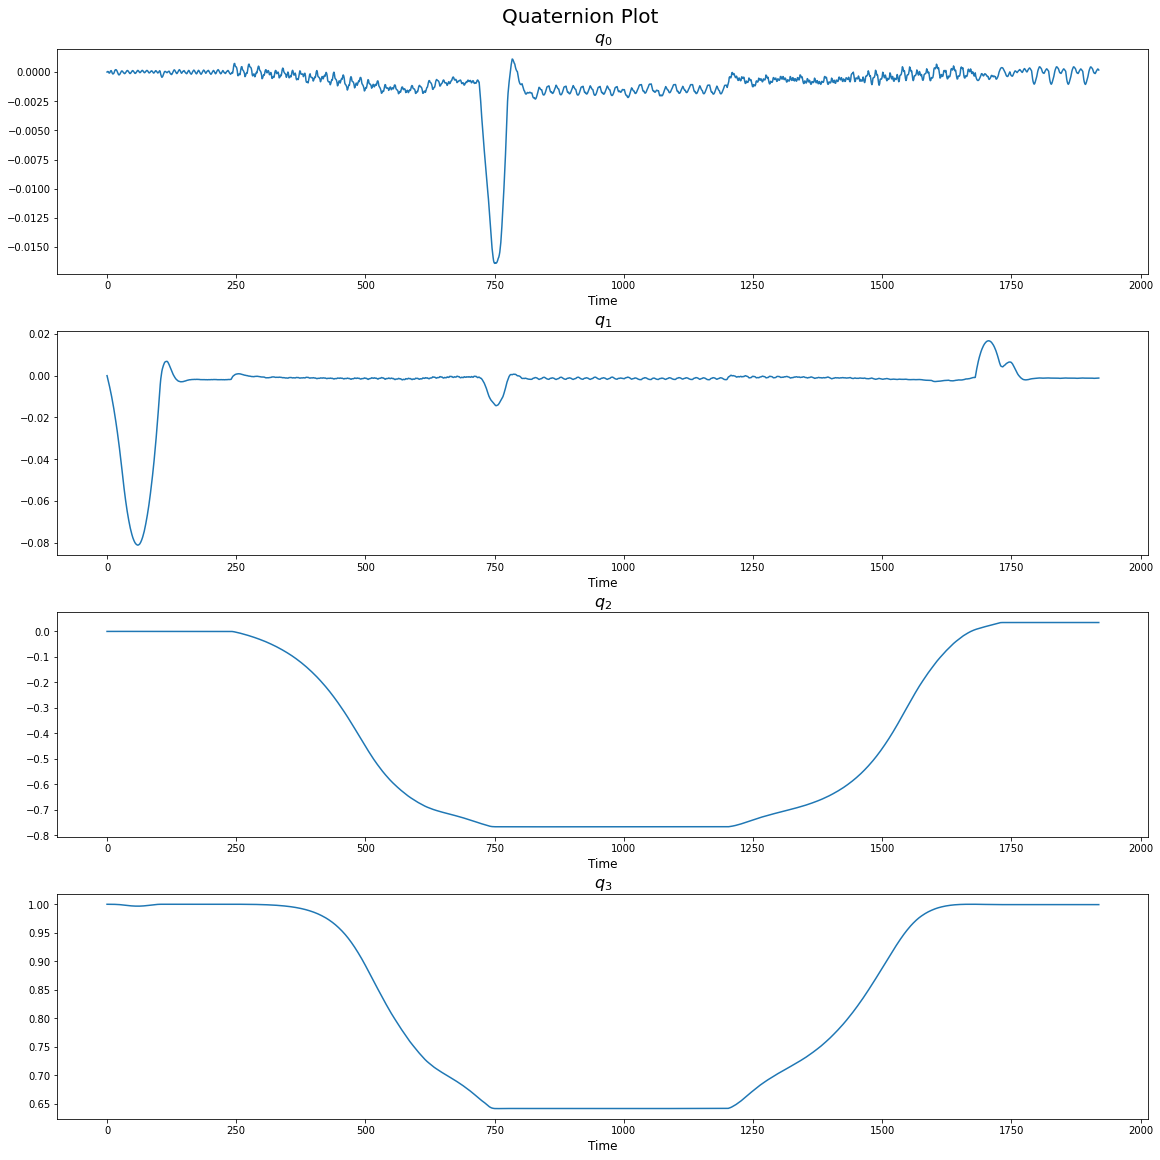

In [7]:
#Plot

t = np.arange(0,orientation.shape[0],1)

fig, ax = plt.subplots(4,1, figsize=(16,16), constrained_layout = True)
for i in range(orientation.shape[1]):
    ax[i].plot(t, orientation[:,i])
    ax[i].set_xlabel("Time", fontsize = 12)
    ax[i].set_title(f"$q_{i}$", size=16)
fig.suptitle("Quaternion Plot", fontsize = 20)
plt.show()

# Konversi Quaternion ke Axis Angle

In [8]:
axisAngleW = np.zeros((orientation.shape[0],3))
axisAngleT = np.zeros((orientation.shape[0],1))
for i in range(orientation.shape[0]):
    temp = p.getAxisAngleFromQuaternion(orientation[i])
    axisAngleW[i,:] = np.array(temp[0])
    axisAngleT[i,:] = np.array(temp[1])

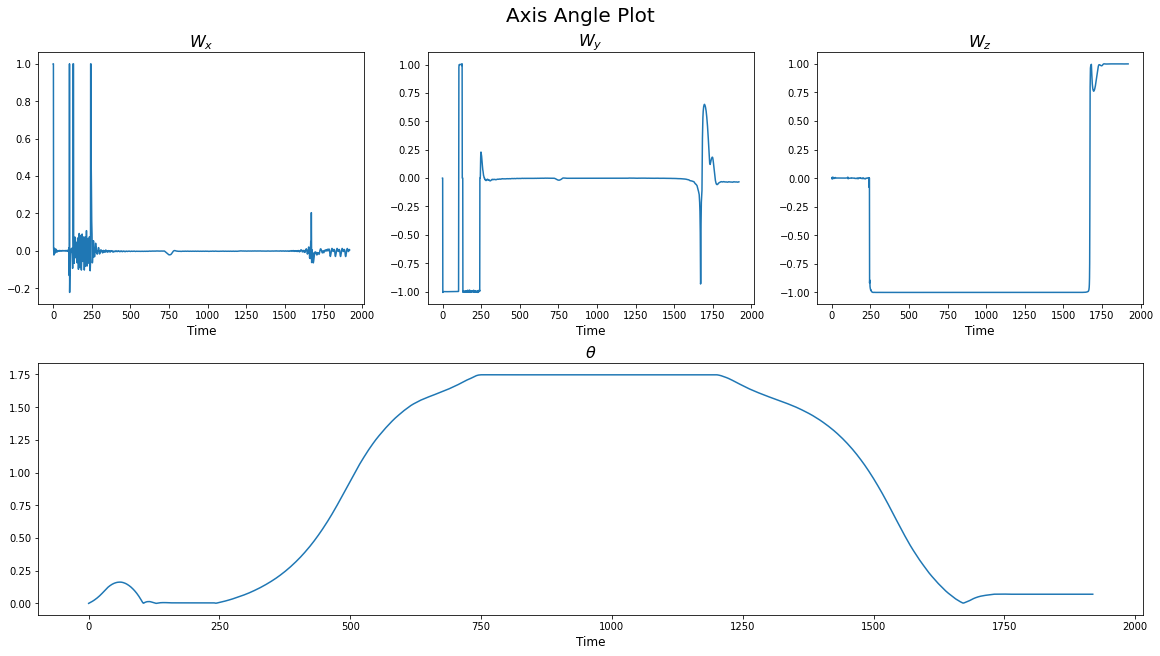

In [9]:
#Plot
fig = plt.figure(figsize=(16, 9), layout="constrained")
spec = fig.add_gridspec(2, 3)

ax00 = fig.add_subplot(spec[0, 0])
ax00.plot(t, axisAngleW[:,0])
ax00.set_title("$W_x$", size = 16)
ax00.set_xlabel("Time", fontsize = 12)

ax01 = fig.add_subplot(spec[0, 1])
ax01.plot(t, axisAngleW[:,1])
ax01.set_title("$W_y$", size = 16)
ax01.set_xlabel("Time", fontsize = 12)

ax02 = fig.add_subplot(spec[0, 2])
ax02.plot(t, axisAngleW[:,2])
ax02.set_title("$W_z$", size = 16)
ax02.set_xlabel("Time", fontsize = 12)

ax2 = fig.add_subplot(spec[1, :])
ax2.plot(t, axisAngleT[:,0])
ax2.set_title("$\\theta$", size = 16)
ax2.set_xlabel("Time", fontsize = 12)

fig.suptitle('Axis Angle Plot', fontsize = 20)
plt.show()

# Konversi Quaternion ke Roll-Pitch-Yaw

Karena sebenarnya euler dalam pybullet adalah roll-pitch-yaw
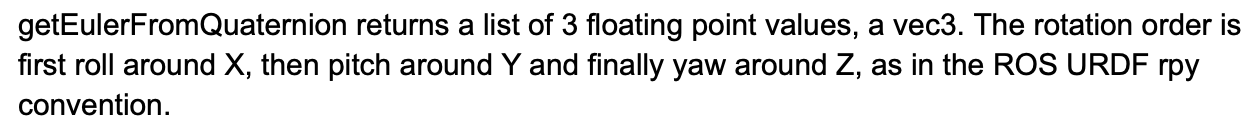

In [10]:
RPY = np.zeros((orientation.shape[0],3))
for i in range(orientation.shape[0]):
    RPY[i] = p.getEulerFromQuaternion(orientation[i])

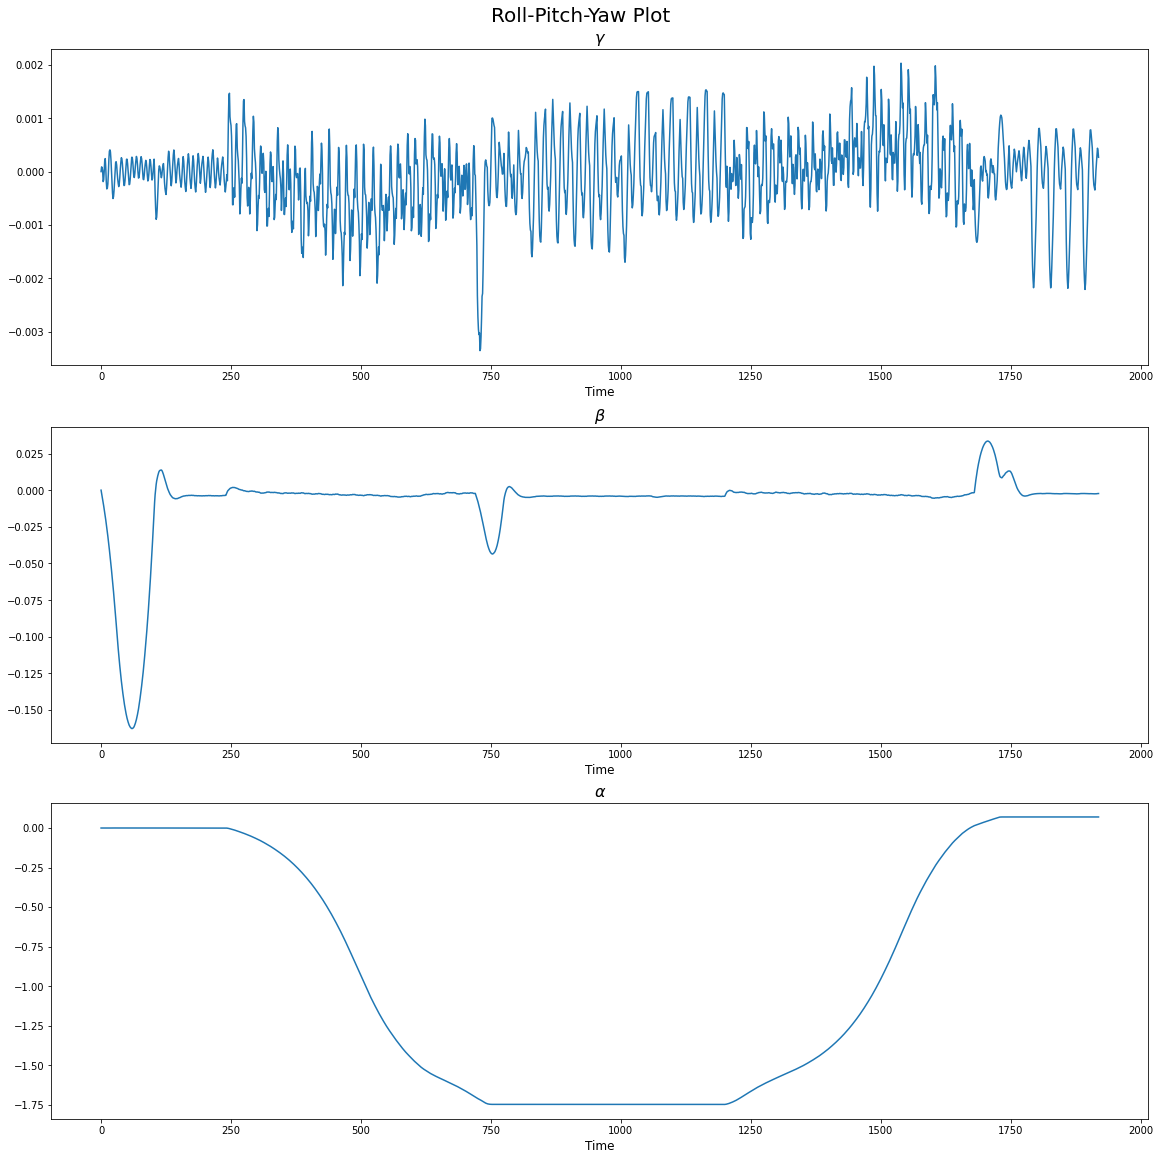

In [11]:
# Plot

fig, ax = plt.subplots(3,1, figsize=(16,16), constrained_layout = True)
for i in range(RPY.shape[1]):
    ax[i].plot(t, RPY[:,i])
    ax[i].set_xlabel("Time", fontsize = 12)
    if i == 0:
        ax[i].set_title("$\gamma$", size=16)
    elif i == 1:
        ax[i].set_title("$\\beta$", size=16)
    else:
        ax[i].set_title("$\\alpha$", size=16)
fig.suptitle("Roll-Pitch-Yaw Plot", fontsize = 20)
plt.show()

# Konversi Roll-Pitch-Yaw ke Euler Angle

Sejatinya matriks roll-pitch-yaw identik dengan euler angle hanya berbeda urutan
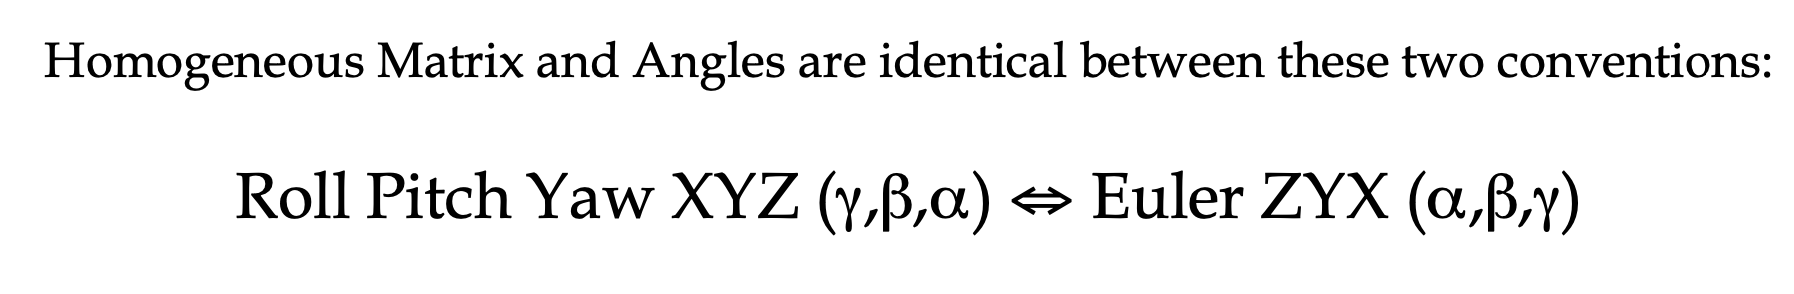

Source: https://web.mit.edu/2.05/www/Handout/HO2.PDF

In [12]:
EulerAngle = np.zeros((orientation.shape[0],3))

EulerAngle[:,0], EulerAngle[:,1], EulerAngle[:,2] = RPY[:,2], RPY[:,1], RPY[:,0]

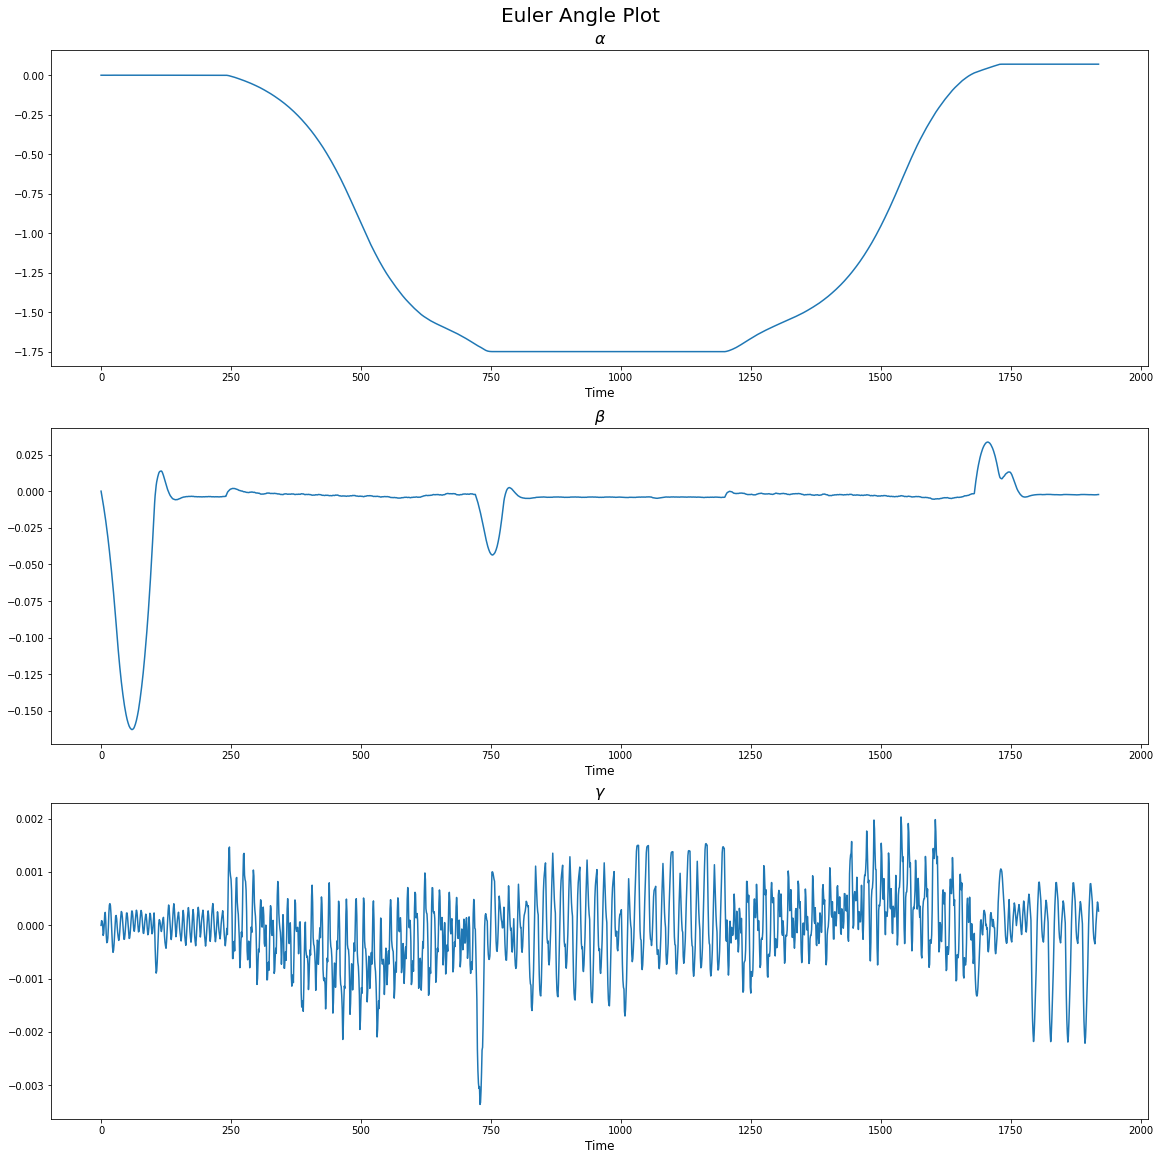

In [13]:
# Plot

fig, ax = plt.subplots(3,1, figsize=(16,16), constrained_layout = True)
for i in range(EulerAngle.shape[1]):
    ax[i].plot(t, EulerAngle[:,i])
    ax[i].set_xlabel("Time", fontsize = 12)
    if i == 0:
        ax[i].set_title("$\\alpha$", size=16)
    elif i == 1:
        ax[i].set_title("$\\beta$", size=16)
    else:
        ax[i].set_title("$\gamma$", size=16)
fig.suptitle("Euler Angle Plot", fontsize = 20)
plt.show()